In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [3]:
job_params = {    
    'notch_filt' :     None,
    'n_ch_tif' : 26,
    'convert_plane_ids_to_channel_ids' : False,
    
    'n_init_files' :   1,
    'init_file_pool' : None,
    'init_file_sample_method': 'random',
    
    'subtract_crosstalk' : True,
    'override_crosstalk' : 0.36,
    'crosstalk_n_planes' : 4, 
    
    'nonrigid' : True,
    'smooth_sigma' : 1.15,
    'maxregshift' : 0.15,
    'reg_filter_pcorr' : 1,
    'generate_sample_registered_bins' : False,

    'dtype' : n.float32,
    'tif_batch_size' : 1,
}



In [7]:
subjects_dir =   '/mnt/zortex-subjects/'
expt_info = { 
    'subject':         'AH012',
    'date' :          '2024-06-20',
    'expnum' :         [101,103,104,105,106],}

tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info, verbose=False)

job_params['fs'] = si_params['vol_rate']

savedir = os.path.join('/mnt/md0/runs', expt_info['subject'], expt_info['date'])
os.makedirs(savedir, exist_ok=True)

# Create the job
job = Job('/mnt/md0/runs',exp_str + '-more-planes', tifs = tifs,
          params=job_params, create=True, overwrite=True, verbosity = 100)



Loading job directory for AH012_2024-06-20_101-103-104-105-106-more-planes in /mnt/md0/runs
      Created dir /mnt/md0/runs/s3d-AH012_2024-06-20_101-103-104-105-106-more-planes/registered_fused_data
      Created dir /mnt/md0/runs/s3d-AH012_2024-06-20_101-103-104-105-106-more-planes/summary
      Created dir /mnt/md0/runs/s3d-AH012_2024-06-20_101-103-104-105-106-more-planes/iters
   Loading default params
      Updating param notch_filt
      Updating param n_ch_tif
      Updating param convert_plane_ids_to_channel_ids
      Updating param n_init_files
      Updating param init_file_pool
      Updating param init_file_sample_method
      Updating param subtract_crosstalk
      Updating param override_crosstalk
      Updating param crosstalk_n_planes
      Updating param nonrigid
      Updating param smooth_sigma
      Updating param maxregshift
      Updating param reg_filter_pcorr
      Updating param generate_sample_registered_bins
      Updating param dtype
      Updating param tif_

   Saved a copy of params at /mnt/md0/runs/s3d-AH012_2024-06-20_101-103-104-105-106-more-planes/summary
   Updated main params file
Launching initial pass
Saving summary to /mnt/md0/runs/s3d-AH012_2024-06-20_101-103-104-105-106-more-planes/summary/summary.npy
   Loading init tifs with 26 channels
      Loading /mnt/zortex-subjects/AH012/2024-06-20/105/2024-06-20_105_AH012_2P_00001_00041.tif
      Loading /mnt/zortex-subjects/AH012/2024-06-20/103/2024-06-20_103_AH012_2P_00001_00011.tif
      Loading /mnt/zortex-subjects/AH012/2024-06-20/103/2024-06-20_103_AH012_2P_00001_00008.tif
      Loading /mnt/zortex-subjects/AH012/2024-06-20/103/2024-06-20_103_AH012_2P_00001_00017.tif
   Loaded 4 files, total 8.69 GB
   Loaded movie with 400 frames and shape 18, 900, 720
      Enforcing positivity in mean image
   Subtracting crosstalk with forced coefficient 0.360
         Subtracting plane 0 from 12
         Subtracting plane 1 from 13
         Subtracting plane 2 from 14
         Subtracting pl

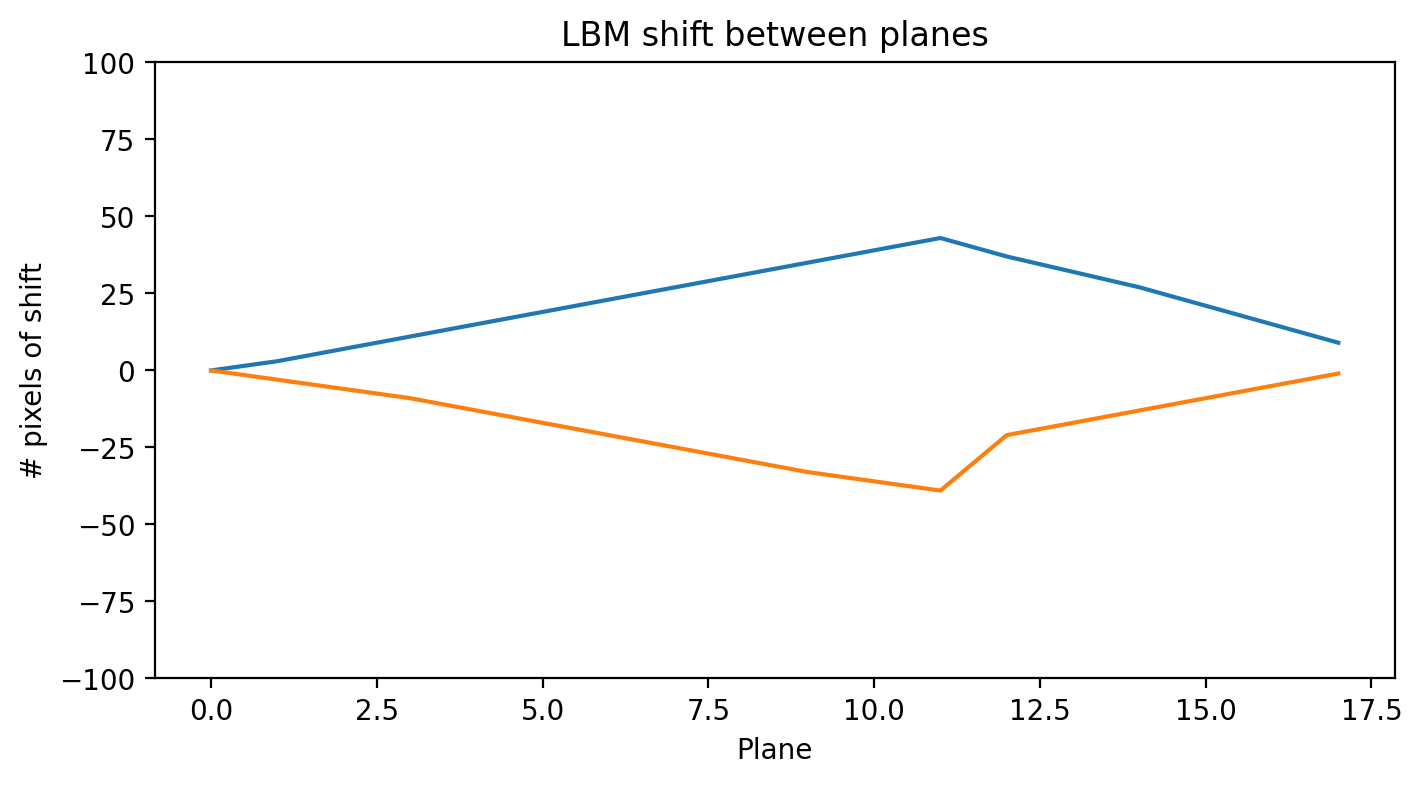

In [10]:
job.params['planes'] = n.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22,  1,  3,
         5,  7, 9, 11])
job.params['3d_reg'] = True
job.params['fuse_shift_override'] = 8
job.params['init_n_frames'] = 400
job.params['override_crosstalk'] = 0.36
job.params['cavity_size'] = 12
job.verbosity = 100
job.params['n_init_files'] = 4
job.run_init_pass()

In [11]:
summary = job.load_summary()

In [ ]:
job.register_gpu_3d()

      Found dir /mnt/md0/runs/s3d-AH012_2024-06-20_101-103-104-105-106-more-planes/registered_fused_data
      Updating self.dirs tag registered_fused_data
   Overriding fuse shift value to 8
   Not clipping frames for registration
Will analyze 170 tifs in 170 batches
   Enforcing positivity
   Launching IO thread
               [Thread] Loading batch 0 

         Memory at batch 0.  Total Used: 224.959 GB, Virtual Available: 293.922 GB, Virtual Used: 209.273 GB, Swap Used: 015.686 GB
Loading Batch 0 of 169
                  [Thread] Before load 0 
Total Used: 224.959 GB, Virtual Available: 293.922 GB, Virtual Used: 209.273 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-20/101/2024-06-20_101_AH012_2P_00001_00001.tif


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 0 ready to join after 35.85 sec 

                  [Thread] After load 0 
Total Used: 227.197 GB, Virtual Available: 291.684 GB, Virtual Used: 211.511 GB, Swap Used: 015.686 GB
   Batch 0 IO thread joined
         Memory after IO thread joinTotal Used: 227.197 GB, Virtual Available: 291.684 GB, Virtual Used: 211.511 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 229.375 GB, Virtual Available: 289.506 GB, Virtual Used: 213.689 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 188.404 GB, Virtual Available: 330.477 GB, Virtual Used: 172.718 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 1 

         After IO thread launch:Total Used: 188.404 GB, Virtual Available: 330.477 GB, Virtual Used: 172.718 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [Threa

/home/ali/packages/s2p-lbm/suite3d/quality_metrics.py:41: RuntimeWarning: invalid value encountered in divide
  dff = df / fs.mean(axis=1,keepdims=True)
/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


         After full batch saving:Total Used: 195.596 GB, Virtual Available: 323.285 GB, Virtual Used: 179.911 GB, Swap Used: 015.686 GB
         Memory at batch 1.  Total Used: 195.597 GB, Virtual Available: 323.284 GB, Virtual Used: 179.911 GB, Swap Used: 015.686 GB
Loading Batch 1 of 169


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 1 ready to join after 43.38 sec 

                  [Thread] After load 1 
Total Used: 197.700 GB, Virtual Available: 321.180 GB, Virtual Used: 182.015 GB, Swap Used: 015.686 GB
   Batch 1 IO thread joined
         Memory after IO thread joinTotal Used: 197.700 GB, Virtual Available: 321.180 GB, Virtual Used: 182.015 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.330 GB, Virtual Available: 323.551 GB, Virtual Used: 179.644 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.149 GB, Virtual Available: 325.732 GB, Virtual Used: 177.463 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 2 

         After IO thread launch:Total Used: 193.149 GB, Virtual Available: 325.732 GB, Virtual Used: 177.463 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [Threa

/home/ali/packages/s2p-lbm/suite3d/quality_metrics.py:22: RuntimeWarning: divide by zero encountered in divide
  'signal_to_background_ratio' : sig / bg,


         After full batch saving:Total Used: 195.540 GB, Virtual Available: 323.340 GB, Virtual Used: 179.855 GB, Swap Used: 015.686 GB
         Memory at batch 2.  Total Used: 195.540 GB, Virtual Available: 323.340 GB, Virtual Used: 179.855 GB, Swap Used: 015.686 GB
Loading Batch 2 of 169


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 2 ready to join after 59.46 sec 

                  [Thread] After load 2 
Total Used: 197.748 GB, Virtual Available: 321.133 GB, Virtual Used: 182.062 GB, Swap Used: 015.686 GB
   Batch 2 IO thread joined
         Memory after IO thread joinTotal Used: 197.748 GB, Virtual Available: 321.133 GB, Virtual Used: 182.062 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.369 GB, Virtual Available: 323.512 GB, Virtual Used: 179.683 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.197 GB, Virtual Available: 325.684 GB, Virtual Used: 177.512 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 3 

                  [Thread] Before load 3 
Total Used: 193.197 GB, Virtual Available: 325.684 GB, Virtual Used: 177.512 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-20/101/2024-

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 3 ready to join after 58.49 sec 

                  [Thread] After load 3 
Total Used: 197.819 GB, Virtual Available: 321.062 GB, Virtual Used: 182.134 GB, Swap Used: 015.686 GB
   Batch 3 IO thread joined
         Memory after IO thread joinTotal Used: 197.819 GB, Virtual Available: 321.062 GB, Virtual Used: 182.134 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.437 GB, Virtual Available: 323.444 GB, Virtual Used: 179.751 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.262 GB, Virtual Available: 325.619 GB, Virtual Used: 177.576 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 4 

         After IO thread launch:Total Used: 193.262 GB, Virtual Available: 325.619 GB, Virtual Used: 177.576 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [Threa

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 4 ready to join after 55.36 sec 

                  [Thread] After load 4 
Total Used: 197.892 GB, Virtual Available: 320.989 GB, Virtual Used: 182.207 GB, Swap Used: 015.686 GB
   Batch 4 IO thread joined
         Memory after IO thread joinTotal Used: 197.892 GB, Virtual Available: 320.989 GB, Virtual Used: 182.207 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.511 GB, Virtual Available: 323.370 GB, Virtual Used: 179.825 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.333 GB, Virtual Available: 325.548 GB, Virtual Used: 177.648 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 5 

         After IO thread launch:Total Used: 193.333 GB, Virtual Available: 325.548 GB, Virtual Used: 177.648 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [Threa

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 5 ready to join after 55.11 sec 

                  [Thread] After load 5 
Total Used: 197.877 GB, Virtual Available: 321.003 GB, Virtual Used: 182.192 GB, Swap Used: 015.686 GB
   Batch 5 IO thread joined
         Memory after IO thread joinTotal Used: 197.877 GB, Virtual Available: 321.003 GB, Virtual Used: 182.192 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.494 GB, Virtual Available: 323.387 GB, Virtual Used: 179.808 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.314 GB, Virtual Available: 325.566 GB, Virtual Used: 177.629 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 6 

         After IO thread launch:Total Used: 193.314 GB, Virtual Available: 325.566 GB, Virtual Used: 177.629 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [Threa

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 6 ready to join after 50.95 sec 

                  [Thread] After load 6 
Total Used: 197.886 GB, Virtual Available: 320.995 GB, Virtual Used: 182.201 GB, Swap Used: 015.686 GB
   Batch 6 IO thread joined
         Memory after IO thread joinTotal Used: 197.886 GB, Virtual Available: 320.995 GB, Virtual Used: 182.201 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.507 GB, Virtual Available: 323.374 GB, Virtual Used: 179.822 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.336 GB, Virtual Available: 325.545 GB, Virtual Used: 177.650 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 7 

         After IO thread launch:Total Used: 193.336 GB, Virtual Available: 325.545 GB, Virtual Used: 177.650 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [Threa

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 7 ready to join after 45.54 sec 

                  [Thread] After load 7 
Total Used: 197.920 GB, Virtual Available: 320.961 GB, Virtual Used: 182.235 GB, Swap Used: 015.686 GB
   Batch 7 IO thread joined
         Memory after IO thread joinTotal Used: 197.920 GB, Virtual Available: 320.961 GB, Virtual Used: 182.235 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.541 GB, Virtual Available: 323.339 GB, Virtual Used: 179.856 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.366 GB, Virtual Available: 325.515 GB, Virtual Used: 177.680 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 8 

         After IO thread launch:Total Used: 193.366 GB, Virtual Available: 325.515 GB, Virtual Used: 177.680 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [Threa

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 8 ready to join after 45.67 sec 

                  [Thread] After load 8 
Total Used: 197.976 GB, Virtual Available: 320.905 GB, Virtual Used: 182.291 GB, Swap Used: 015.686 GB
   Batch 8 IO thread joined
         Memory after IO thread joinTotal Used: 197.976 GB, Virtual Available: 320.905 GB, Virtual Used: 182.291 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.603 GB, Virtual Available: 323.278 GB, Virtual Used: 179.918 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.426 GB, Virtual Available: 325.455 GB, Virtual Used: 177.740 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 9 

         After IO thread launch:Total Used: 193.426 GB, Virtual Available: 325.455 GB, Virtual Used: 177.740 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [Threa

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 9 ready to join after 45.70 sec 

                  [Thread] After load 9 
Total Used: 197.914 GB, Virtual Available: 320.967 GB, Virtual Used: 182.229 GB, Swap Used: 015.686 GB
   Batch 9 IO thread joined
         Memory after IO thread joinTotal Used: 197.914 GB, Virtual Available: 320.967 GB, Virtual Used: 182.229 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.543 GB, Virtual Available: 323.337 GB, Virtual Used: 179.858 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.363 GB, Virtual Available: 325.518 GB, Virtual Used: 177.677 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 10 

         After IO thread launch:Total Used: 193.363 GB, Virtual Available: 325.518 GB, Virtual Used: 177.677 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 10 ready to join after 45.57 sec 

                  [Thread] After load 10 
Total Used: 197.912 GB, Virtual Available: 320.969 GB, Virtual Used: 182.226 GB, Swap Used: 015.686 GB
   Batch 10 IO thread joined
         Memory after IO thread joinTotal Used: 197.912 GB, Virtual Available: 320.969 GB, Virtual Used: 182.226 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.528 GB, Virtual Available: 323.352 GB, Virtual Used: 179.843 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.356 GB, Virtual Available: 325.524 GB, Virtual Used: 177.671 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 11 

         After IO thread launch:Total Used: 193.356 GB, Virtual Available: 325.524 GB, Virtual Used: 177.671 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 11 ready to join after 46.61 sec 

                  [Thread] After load 11 
Total Used: 197.927 GB, Virtual Available: 320.954 GB, Virtual Used: 182.241 GB, Swap Used: 015.686 GB
   Batch 11 IO thread joined
         Memory after IO thread joinTotal Used: 197.927 GB, Virtual Available: 320.954 GB, Virtual Used: 182.241 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.550 GB, Virtual Available: 323.331 GB, Virtual Used: 179.864 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.365 GB, Virtual Available: 325.515 GB, Virtual Used: 177.680 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 12 

         After IO thread launch:Total Used: 193.365 GB, Virtual Available: 325.515 GB, Virtual Used: 177.680 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 12 ready to join after 48.36 sec 

                  [Thread] After load 12 
Total Used: 197.993 GB, Virtual Available: 320.888 GB, Virtual Used: 182.307 GB, Swap Used: 015.686 GB
   Batch 12 IO thread joined
         Memory after IO thread joinTotal Used: 197.993 GB, Virtual Available: 320.888 GB, Virtual Used: 182.307 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.621 GB, Virtual Available: 323.260 GB, Virtual Used: 179.935 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.443 GB, Virtual Available: 325.438 GB, Virtual Used: 177.758 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 13 

         After IO thread launch:Total Used: 193.443 GB, Virtual Available: 325.438 GB, Virtual Used: 177.758 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 13 ready to join after 48.94 sec 

                  [Thread] After load 13 
Total Used: 197.943 GB, Virtual Available: 320.937 GB, Virtual Used: 182.258 GB, Swap Used: 015.686 GB
   Batch 13 IO thread joined
         Memory after IO thread joinTotal Used: 197.943 GB, Virtual Available: 320.937 GB, Virtual Used: 182.258 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.560 GB, Virtual Available: 323.320 GB, Virtual Used: 179.875 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.388 GB, Virtual Available: 325.493 GB, Virtual Used: 177.702 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 14 

         After IO thread launch:Total Used: 193.388 GB, Virtual Available: 325.493 GB, Virtual Used: 177.702 GB, Swap Used: 015.686 GB
                  [Thread] Before load 14 
Total Used: 193.388 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 14 ready to join after 47.08 sec 

                  [Thread] After load 14 
Total Used: 197.972 GB, Virtual Available: 320.909 GB, Virtual Used: 182.287 GB, Swap Used: 015.686 GB
   Batch 14 IO thread joined
         Memory after IO thread joinTotal Used: 197.972 GB, Virtual Available: 320.909 GB, Virtual Used: 182.287 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.589 GB, Virtual Available: 323.292 GB, Virtual Used: 179.904 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.412 GB, Virtual Available: 325.469 GB, Virtual Used: 177.726 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 15 

         After IO thread launch:Total Used: 193.412 GB, Virtual Available: 325.469 GB, Virtual Used: 177.726 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 15 ready to join after 48.39 sec 

                  [Thread] After load 15 
Total Used: 198.097 GB, Virtual Available: 320.784 GB, Virtual Used: 182.411 GB, Swap Used: 015.686 GB
   Batch 15 IO thread joined
         Memory after IO thread joinTotal Used: 198.097 GB, Virtual Available: 320.784 GB, Virtual Used: 182.411 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.715 GB, Virtual Available: 323.166 GB, Virtual Used: 180.030 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.542 GB, Virtual Available: 325.339 GB, Virtual Used: 177.856 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 16 

                  [Thread] Before load 16 
Total Used: 193.542 GB, Virtual Available: 325.339 GB, Virtual Used: 177.856 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-20/101/

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 18 ready to join after 50.57 sec 

                  [Thread] After load 18 
Total Used: 198.345 GB, Virtual Available: 320.536 GB, Virtual Used: 182.659 GB, Swap Used: 015.686 GB
   Batch 18 IO thread joined
         Memory after IO thread joinTotal Used: 198.345 GB, Virtual Available: 320.536 GB, Virtual Used: 182.659 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.966 GB, Virtual Available: 322.915 GB, Virtual Used: 180.280 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.794 GB, Virtual Available: 325.086 GB, Virtual Used: 178.109 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 19 

         After IO thread launch:Total Used: 193.794 GB, Virtual Available: 325.086 GB, Virtual Used: 178.109 GB, Swap Used: 015.686 GB
                  [Thread] Before load 19 
Total Used: 193.794 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 19 ready to join after 50.53 sec 

                  [Thread] After load 19 
Total Used: 197.975 GB, Virtual Available: 320.906 GB, Virtual Used: 182.289 GB, Swap Used: 015.686 GB
   Batch 19 IO thread joined
         Memory after IO thread joinTotal Used: 197.975 GB, Virtual Available: 320.906 GB, Virtual Used: 182.289 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.596 GB, Virtual Available: 323.285 GB, Virtual Used: 179.911 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.421 GB, Virtual Available: 325.459 GB, Virtual Used: 177.736 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 20 

         After IO thread launch:Total Used: 193.421 GB, Virtual Available: 325.459 GB, Virtual Used: 177.736 GB, Swap Used: 015.686 GB
                  [Thread] Before load 20 
Total Used: 193.421 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 20 ready to join after 48.75 sec 

                  [Thread] After load 20 
Total Used: 197.971 GB, Virtual Available: 320.910 GB, Virtual Used: 182.286 GB, Swap Used: 015.686 GB
   Batch 20 IO thread joined
         Memory after IO thread joinTotal Used: 197.971 GB, Virtual Available: 320.910 GB, Virtual Used: 182.286 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.590 GB, Virtual Available: 323.291 GB, Virtual Used: 179.904 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.420 GB, Virtual Available: 325.461 GB, Virtual Used: 177.734 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 21 

         After IO thread launch:Total Used: 193.420 GB, Virtual Available: 325.461 GB, Virtual Used: 177.734 GB, Swap Used: 015.686 GB
                  [Thread] Before load 21 
Total Used: 193.420 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 21 ready to join after 50.12 sec 

                  [Thread] After load 21 
Total Used: 198.094 GB, Virtual Available: 320.787 GB, Virtual Used: 182.408 GB, Swap Used: 015.686 GB
   Batch 21 IO thread joined
         Memory after IO thread joinTotal Used: 198.094 GB, Virtual Available: 320.787 GB, Virtual Used: 182.408 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.715 GB, Virtual Available: 323.166 GB, Virtual Used: 180.029 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.539 GB, Virtual Available: 325.341 GB, Virtual Used: 177.854 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 22 

                  [Thread] Before load 22 
Total Used: 193.539 GB, Virtual Available: 325.341 GB, Virtual Used: 177.854 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 193.539 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 22 ready to join after 48.29 sec 

                  [Thread] After load 22 
Total Used: 197.980 GB, Virtual Available: 320.901 GB, Virtual Used: 182.294 GB, Swap Used: 015.686 GB
   Batch 22 IO thread joined
         Memory after IO thread joinTotal Used: 197.980 GB, Virtual Available: 320.901 GB, Virtual Used: 182.294 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.599 GB, Virtual Available: 323.281 GB, Virtual Used: 179.914 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.430 GB, Virtual Available: 325.451 GB, Virtual Used: 177.745 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 23 

         After IO thread launch:Total Used: 193.430 GB, Virtual Available: 325.451 GB, Virtual Used: 177.745 GB, Swap Used: 015.686 GB
                  [Thread] Before load 23 
Total Used: 193.430 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 23 ready to join after 49.62 sec 

                  [Thread] After load 23 
Total Used: 197.973 GB, Virtual Available: 320.908 GB, Virtual Used: 182.287 GB, Swap Used: 015.686 GB
   Batch 23 IO thread joined
         Memory after IO thread joinTotal Used: 197.973 GB, Virtual Available: 320.908 GB, Virtual Used: 182.287 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.590 GB, Virtual Available: 323.290 GB, Virtual Used: 179.905 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.413 GB, Virtual Available: 325.468 GB, Virtual Used: 177.727 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 24 

         After IO thread launch:Total Used: 193.413 GB, Virtual Available: 325.468 GB, Virtual Used: 177.727 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 24 ready to join after 49.19 sec 

                  [Thread] After load 24 
Total Used: 197.963 GB, Virtual Available: 320.918 GB, Virtual Used: 182.278 GB, Swap Used: 015.686 GB
   Batch 24 IO thread joined
         Memory after IO thread joinTotal Used: 197.963 GB, Virtual Available: 320.918 GB, Virtual Used: 182.278 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.609 GB, Virtual Available: 323.272 GB, Virtual Used: 179.924 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.430 GB, Virtual Available: 325.450 GB, Virtual Used: 177.745 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 25 

         After IO thread launch:Total Used: 193.430 GB, Virtual Available: 325.450 GB, Virtual Used: 177.745 GB, Swap Used: 015.686 GB
                  [Thread] Before load 25 
Total Used: 193.430 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 25 ready to join after 49.28 sec 

                  [Thread] After load 25 
Total Used: 197.893 GB, Virtual Available: 320.988 GB, Virtual Used: 182.207 GB, Swap Used: 015.686 GB
   Batch 25 IO thread joined
         Memory after IO thread joinTotal Used: 197.893 GB, Virtual Available: 320.988 GB, Virtual Used: 182.207 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.514 GB, Virtual Available: 323.367 GB, Virtual Used: 179.828 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.339 GB, Virtual Available: 325.542 GB, Virtual Used: 177.653 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 26 

                  [Thread] Before load 26 
Total Used: 193.339 GB, Virtual Available: 325.542 GB, Virtual Used: 177.653 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-20/101/

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 26 ready to join after 51.59 sec 

                  [Thread] After load 26 
Total Used: 197.902 GB, Virtual Available: 320.979 GB, Virtual Used: 182.216 GB, Swap Used: 015.686 GB
   Batch 26 IO thread joined
         Memory after IO thread joinTotal Used: 197.902 GB, Virtual Available: 320.979 GB, Virtual Used: 182.216 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.520 GB, Virtual Available: 323.361 GB, Virtual Used: 179.834 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.347 GB, Virtual Available: 325.533 GB, Virtual Used: 177.662 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 27 

         After IO thread launch:Total Used: 193.347 GB, Virtual Available: 325.533 GB, Virtual Used: 177.662 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 27 ready to join after 50.00 sec 

                  [Thread] After load 27 
Total Used: 197.919 GB, Virtual Available: 320.962 GB, Virtual Used: 182.233 GB, Swap Used: 015.686 GB
   Batch 27 IO thread joined
         Memory after IO thread joinTotal Used: 197.919 GB, Virtual Available: 320.962 GB, Virtual Used: 182.233 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.544 GB, Virtual Available: 323.336 GB, Virtual Used: 179.859 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.362 GB, Virtual Available: 325.519 GB, Virtual Used: 177.676 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 28 

         After IO thread launch:Total Used: 193.362 GB, Virtual Available: 325.519 GB, Virtual Used: 177.676 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 28 ready to join after 49.24 sec 

                  [Thread] After load 28 
Total Used: 198.140 GB, Virtual Available: 320.741 GB, Virtual Used: 182.454 GB, Swap Used: 015.686 GB
   Batch 28 IO thread joined
         Memory after IO thread joinTotal Used: 198.140 GB, Virtual Available: 320.741 GB, Virtual Used: 182.454 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.769 GB, Virtual Available: 323.112 GB, Virtual Used: 180.084 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.592 GB, Virtual Available: 325.289 GB, Virtual Used: 177.906 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 29 

         After IO thread launch:Total Used: 193.592 GB, Virtual Available: 325.289 GB, Virtual Used: 177.906 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 29 ready to join after 51.57 sec 

                  [Thread] After load 29 
Total Used: 197.940 GB, Virtual Available: 320.940 GB, Virtual Used: 182.255 GB, Swap Used: 015.686 GB
   Batch 29 IO thread joined
         Memory after IO thread joinTotal Used: 197.940 GB, Virtual Available: 320.940 GB, Virtual Used: 182.255 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.558 GB, Virtual Available: 323.322 GB, Virtual Used: 179.873 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.381 GB, Virtual Available: 325.500 GB, Virtual Used: 177.695 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 30 

         After IO thread launch:Total Used: 193.381 GB, Virtual Available: 325.500 GB, Virtual Used: 177.695 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 30 ready to join after 49.87 sec 

                  [Thread] After load 30 
Total Used: 198.043 GB, Virtual Available: 320.838 GB, Virtual Used: 182.357 GB, Swap Used: 015.686 GB
   Batch 30 IO thread joined
         Memory after IO thread joinTotal Used: 198.043 GB, Virtual Available: 320.838 GB, Virtual Used: 182.357 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.668 GB, Virtual Available: 323.213 GB, Virtual Used: 179.983 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.491 GB, Virtual Available: 325.390 GB, Virtual Used: 177.805 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 31 

         After IO thread launch:Total Used: 193.491 GB, Virtual Available: 325.390 GB, Virtual Used: 177.805 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 31 ready to join after 51.34 sec 

                  [Thread] After load 31 
Total Used: 197.891 GB, Virtual Available: 320.990 GB, Virtual Used: 182.206 GB, Swap Used: 015.686 GB
   Batch 31 IO thread joined
         Memory after IO thread joinTotal Used: 197.891 GB, Virtual Available: 320.990 GB, Virtual Used: 182.206 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.508 GB, Virtual Available: 323.373 GB, Virtual Used: 179.823 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.335 GB, Virtual Available: 325.546 GB, Virtual Used: 177.649 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 32 

         After IO thread launch:Total Used: 193.335 GB, Virtual Available: 325.546 GB, Virtual Used: 177.649 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 32 ready to join after 49.38 sec 

                  [Thread] After load 32 
Total Used: 198.167 GB, Virtual Available: 320.714 GB, Virtual Used: 182.481 GB, Swap Used: 015.686 GB
   Batch 32 IO thread joined
         Memory after IO thread joinTotal Used: 198.167 GB, Virtual Available: 320.714 GB, Virtual Used: 182.481 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.794 GB, Virtual Available: 323.087 GB, Virtual Used: 180.108 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.615 GB, Virtual Available: 325.266 GB, Virtual Used: 177.929 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 33 

         After IO thread launch:Total Used: 193.615 GB, Virtual Available: 325.266 GB, Virtual Used: 177.929 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 33 ready to join after 49.53 sec 

                  [Thread] After load 33 
Total Used: 197.859 GB, Virtual Available: 321.022 GB, Virtual Used: 182.173 GB, Swap Used: 015.686 GB
   Batch 33 IO thread joined
         Memory after IO thread joinTotal Used: 197.859 GB, Virtual Available: 321.022 GB, Virtual Used: 182.173 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.488 GB, Virtual Available: 323.393 GB, Virtual Used: 179.802 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.305 GB, Virtual Available: 325.576 GB, Virtual Used: 177.620 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 34 

         After IO thread launch:Total Used: 193.305 GB, Virtual Available: 325.576 GB, Virtual Used: 177.620 GB, Swap Used: 015.686 GB
                  [Thread] Before load 34 
Total Used: 193.305 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 34 ready to join after 60.01 sec 

                  [Thread] After load 34 
Total Used: 198.063 GB, Virtual Available: 320.818 GB, Virtual Used: 182.377 GB, Swap Used: 015.686 GB
   Batch 34 IO thread joined
         Memory after IO thread joinTotal Used: 198.063 GB, Virtual Available: 320.818 GB, Virtual Used: 182.377 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.692 GB, Virtual Available: 323.189 GB, Virtual Used: 180.007 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.507 GB, Virtual Available: 325.374 GB, Virtual Used: 177.822 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 35 

                  [Thread] Before load 35 
Total Used: 193.507 GB, Virtual Available: 325.374 GB, Virtual Used: 177.822 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-20/101/

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 35 ready to join after 56.93 sec 

                  [Thread] After load 35 
Total Used: 197.909 GB, Virtual Available: 320.971 GB, Virtual Used: 182.224 GB, Swap Used: 015.686 GB
   Batch 35 IO thread joined
         Memory after IO thread joinTotal Used: 197.909 GB, Virtual Available: 320.971 GB, Virtual Used: 182.224 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.539 GB, Virtual Available: 323.342 GB, Virtual Used: 179.853 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.356 GB, Virtual Available: 325.525 GB, Virtual Used: 177.670 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 36 

         After IO thread launch:Total Used: 193.356 GB, Virtual Available: 325.525 GB, Virtual Used: 177.670 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 36 ready to join after 50.23 sec 

                  [Thread] After load 36 
Total Used: 198.035 GB, Virtual Available: 320.846 GB, Virtual Used: 182.349 GB, Swap Used: 015.686 GB
   Batch 36 IO thread joined
         Memory after IO thread joinTotal Used: 198.035 GB, Virtual Available: 320.846 GB, Virtual Used: 182.349 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.661 GB, Virtual Available: 323.219 GB, Virtual Used: 179.976 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.477 GB, Virtual Available: 325.404 GB, Virtual Used: 177.791 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 37 

         After IO thread launch:Total Used: 193.477 GB, Virtual Available: 325.404 GB, Virtual Used: 177.791 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 37 ready to join after 49.25 sec 

                  [Thread] After load 37 
Total Used: 197.877 GB, Virtual Available: 321.004 GB, Virtual Used: 182.191 GB, Swap Used: 015.686 GB
   Batch 37 IO thread joined
         Memory after IO thread joinTotal Used: 197.877 GB, Virtual Available: 321.004 GB, Virtual Used: 182.191 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.506 GB, Virtual Available: 323.375 GB, Virtual Used: 179.820 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.322 GB, Virtual Available: 325.559 GB, Virtual Used: 177.636 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 38 

         After IO thread launch:Total Used: 193.322 GB, Virtual Available: 325.559 GB, Virtual Used: 177.636 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 38 ready to join after 51.02 sec 

                  [Thread] After load 38 
Total Used: 198.053 GB, Virtual Available: 320.828 GB, Virtual Used: 182.367 GB, Swap Used: 015.686 GB
   Batch 38 IO thread joined
         Memory after IO thread joinTotal Used: 198.053 GB, Virtual Available: 320.828 GB, Virtual Used: 182.367 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.682 GB, Virtual Available: 323.199 GB, Virtual Used: 179.997 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.497 GB, Virtual Available: 325.384 GB, Virtual Used: 177.811 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 39 

         After IO thread launch:Total Used: 193.497 GB, Virtual Available: 325.384 GB, Virtual Used: 177.811 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 39 ready to join after 49.63 sec 

                  [Thread] After load 39 
Total Used: 198.039 GB, Virtual Available: 320.842 GB, Virtual Used: 182.353 GB, Swap Used: 015.686 GB
   Batch 39 IO thread joined
         Memory after IO thread joinTotal Used: 198.039 GB, Virtual Available: 320.842 GB, Virtual Used: 182.353 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.667 GB, Virtual Available: 323.213 GB, Virtual Used: 179.982 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.483 GB, Virtual Available: 325.398 GB, Virtual Used: 177.798 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 40 

         After IO thread launch:Total Used: 193.483 GB, Virtual Available: 325.398 GB, Virtual Used: 177.798 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 40 ready to join after 51.65 sec 

                  [Thread] After load 40 
Total Used: 198.214 GB, Virtual Available: 320.667 GB, Virtual Used: 182.529 GB, Swap Used: 015.686 GB
   Batch 40 IO thread joined
         Memory after IO thread joinTotal Used: 198.214 GB, Virtual Available: 320.667 GB, Virtual Used: 182.529 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.833 GB, Virtual Available: 323.048 GB, Virtual Used: 180.147 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.663 GB, Virtual Available: 325.218 GB, Virtual Used: 177.977 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 41 

         After IO thread launch:Total Used: 193.663 GB, Virtual Available: 325.218 GB, Virtual Used: 177.977 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 41 ready to join after 50.70 sec 

                  [Thread] After load 41 
Total Used: 198.126 GB, Virtual Available: 320.755 GB, Virtual Used: 182.440 GB, Swap Used: 015.686 GB
   Batch 41 IO thread joined
         Memory after IO thread joinTotal Used: 198.126 GB, Virtual Available: 320.755 GB, Virtual Used: 182.440 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.754 GB, Virtual Available: 323.126 GB, Virtual Used: 180.069 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.572 GB, Virtual Available: 325.309 GB, Virtual Used: 177.886 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 42 

         After IO thread launch:Total Used: 193.572 GB, Virtual Available: 325.309 GB, Virtual Used: 177.886 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 42 ready to join after 48.28 sec 

                  [Thread] After load 42 
Total Used: 198.163 GB, Virtual Available: 320.717 GB, Virtual Used: 182.478 GB, Swap Used: 015.686 GB
   Batch 42 IO thread joined
         Memory after IO thread joinTotal Used: 198.163 GB, Virtual Available: 320.717 GB, Virtual Used: 182.478 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.790 GB, Virtual Available: 323.091 GB, Virtual Used: 180.105 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.611 GB, Virtual Available: 325.269 GB, Virtual Used: 177.926 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 43 

         After IO thread launch:Total Used: 193.611 GB, Virtual Available: 325.269 GB, Virtual Used: 177.926 GB, Swap Used: 015.686 GB
                  [Thread] Before load 43 
Total Used: 193.611 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 43 ready to join after 48.36 sec 

                  [Thread] After load 43 
Total Used: 198.153 GB, Virtual Available: 320.727 GB, Virtual Used: 182.468 GB, Swap Used: 015.686 GB
   Batch 43 IO thread joined
         Memory after IO thread joinTotal Used: 198.153 GB, Virtual Available: 320.727 GB, Virtual Used: 182.468 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.772 GB, Virtual Available: 323.109 GB, Virtual Used: 180.086 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.595 GB, Virtual Available: 325.285 GB, Virtual Used: 177.910 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 44 

         After IO thread launch:Total Used: 193.595 GB, Virtual Available: 325.285 GB, Virtual Used: 177.910 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 44 ready to join after 47.18 sec 

                  [Thread] After load 44 
Total Used: 198.212 GB, Virtual Available: 320.669 GB, Virtual Used: 182.526 GB, Swap Used: 015.686 GB
   Batch 44 IO thread joined
         Memory after IO thread joinTotal Used: 198.212 GB, Virtual Available: 320.669 GB, Virtual Used: 182.526 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.841 GB, Virtual Available: 323.040 GB, Virtual Used: 180.155 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.656 GB, Virtual Available: 325.224 GB, Virtual Used: 177.971 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 45 

         After IO thread launch:Total Used: 193.656 GB, Virtual Available: 325.224 GB, Virtual Used: 177.971 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 45 ready to join after 47.82 sec 

                  [Thread] After load 45 
Total Used: 198.101 GB, Virtual Available: 320.780 GB, Virtual Used: 182.415 GB, Swap Used: 015.686 GB
   Batch 45 IO thread joined
         Memory after IO thread joinTotal Used: 198.101 GB, Virtual Available: 320.780 GB, Virtual Used: 182.415 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.719 GB, Virtual Available: 323.162 GB, Virtual Used: 180.033 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.543 GB, Virtual Available: 325.338 GB, Virtual Used: 177.857 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 46 

         After IO thread launch:Total Used: 193.543 GB, Virtual Available: 325.338 GB, Virtual Used: 177.857 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 46 ready to join after 47.67 sec 

                  [Thread] After load 46 
Total Used: 198.121 GB, Virtual Available: 320.760 GB, Virtual Used: 182.435 GB, Swap Used: 015.686 GB
   Batch 46 IO thread joined
         Memory after IO thread joinTotal Used: 198.121 GB, Virtual Available: 320.760 GB, Virtual Used: 182.435 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.750 GB, Virtual Available: 323.131 GB, Virtual Used: 180.064 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.573 GB, Virtual Available: 325.308 GB, Virtual Used: 177.887 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 47 

         After IO thread launch:Total Used: 193.573 GB, Virtual Available: 325.308 GB, Virtual Used: 177.887 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 47 ready to join after 48.17 sec 

                  [Thread] After load 47 
Total Used: 198.071 GB, Virtual Available: 320.810 GB, Virtual Used: 182.386 GB, Swap Used: 015.686 GB
   Batch 47 IO thread joined
         Memory after IO thread joinTotal Used: 198.071 GB, Virtual Available: 320.810 GB, Virtual Used: 182.386 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.702 GB, Virtual Available: 323.178 GB, Virtual Used: 180.017 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.520 GB, Virtual Available: 325.361 GB, Virtual Used: 177.834 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 48 

         After IO thread launch:Total Used: 193.520 GB, Virtual Available: 325.361 GB, Virtual Used: 177.834 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 48 ready to join after 50.39 sec 

                  [Thread] After load 48 
Total Used: 198.167 GB, Virtual Available: 320.714 GB, Virtual Used: 182.481 GB, Swap Used: 015.686 GB
   Batch 48 IO thread joined
         Memory after IO thread joinTotal Used: 198.167 GB, Virtual Available: 320.714 GB, Virtual Used: 182.481 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.794 GB, Virtual Available: 323.087 GB, Virtual Used: 180.109 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.613 GB, Virtual Available: 325.267 GB, Virtual Used: 177.928 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 49 

         After IO thread launch:Total Used: 193.613 GB, Virtual Available: 325.267 GB, Virtual Used: 177.928 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 49 ready to join after 50.44 sec 

                  [Thread] After load 49 
Total Used: 198.195 GB, Virtual Available: 320.686 GB, Virtual Used: 182.509 GB, Swap Used: 015.686 GB
   Batch 49 IO thread joined
         Memory after IO thread joinTotal Used: 198.195 GB, Virtual Available: 320.686 GB, Virtual Used: 182.509 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.818 GB, Virtual Available: 323.063 GB, Virtual Used: 180.132 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.634 GB, Virtual Available: 325.247 GB, Virtual Used: 177.948 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 50 

         After IO thread launch:Total Used: 193.634 GB, Virtual Available: 325.247 GB, Virtual Used: 177.948 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 50 ready to join after 47.88 sec 

                  [Thread] After load 50 
Total Used: 198.182 GB, Virtual Available: 320.699 GB, Virtual Used: 182.496 GB, Swap Used: 015.686 GB
   Batch 50 IO thread joined
         Memory after IO thread joinTotal Used: 198.182 GB, Virtual Available: 320.699 GB, Virtual Used: 182.496 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.811 GB, Virtual Available: 323.070 GB, Virtual Used: 180.125 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.634 GB, Virtual Available: 325.247 GB, Virtual Used: 177.948 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 51 

         After IO thread launch:Total Used: 193.634 GB, Virtual Available: 325.247 GB, Virtual Used: 177.948 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 51 ready to join after 47.46 sec 

                  [Thread] After load 51 
Total Used: 198.222 GB, Virtual Available: 320.659 GB, Virtual Used: 182.536 GB, Swap Used: 015.686 GB
   Batch 51 IO thread joined
         Memory after IO thread joinTotal Used: 198.222 GB, Virtual Available: 320.659 GB, Virtual Used: 182.536 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.851 GB, Virtual Available: 323.030 GB, Virtual Used: 180.165 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.669 GB, Virtual Available: 325.212 GB, Virtual Used: 177.983 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 52 

         After IO thread launch:Total Used: 193.669 GB, Virtual Available: 325.212 GB, Virtual Used: 177.983 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 52 ready to join after 50.36 sec 

                  [Thread] After load 52 
Total Used: 198.224 GB, Virtual Available: 320.656 GB, Virtual Used: 182.539 GB, Swap Used: 015.686 GB
   Batch 52 IO thread joined
         Memory after IO thread joinTotal Used: 198.224 GB, Virtual Available: 320.656 GB, Virtual Used: 182.539 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.846 GB, Virtual Available: 323.035 GB, Virtual Used: 180.160 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.674 GB, Virtual Available: 325.206 GB, Virtual Used: 177.989 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 53 

                  [Thread] Before load 53 
Total Used: 193.674 GB, Virtual Available: 325.206 GB, Virtual Used: 177.989 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-20/101/

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 53 ready to join after 48.62 sec 

                  [Thread] After load 53 
Total Used: 198.154 GB, Virtual Available: 320.727 GB, Virtual Used: 182.469 GB, Swap Used: 015.686 GB
   Batch 53 IO thread joined
         Memory after IO thread joinTotal Used: 198.154 GB, Virtual Available: 320.727 GB, Virtual Used: 182.469 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.777 GB, Virtual Available: 323.104 GB, Virtual Used: 180.092 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.599 GB, Virtual Available: 325.282 GB, Virtual Used: 177.913 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 54 

         After IO thread launch:Total Used: 193.599 GB, Virtual Available: 325.282 GB, Virtual Used: 177.913 GB, Swap Used: 015.686 GB
                  [Thread] Before load 54 
Total Used: 193.599 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 54 ready to join after 49.35 sec 

                  [Thread] After load 54 
Total Used: 198.162 GB, Virtual Available: 320.718 GB, Virtual Used: 182.477 GB, Swap Used: 015.686 GB
   Batch 54 IO thread joined
         Memory after IO thread joinTotal Used: 198.162 GB, Virtual Available: 320.718 GB, Virtual Used: 182.477 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.788 GB, Virtual Available: 323.093 GB, Virtual Used: 180.102 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.609 GB, Virtual Available: 325.272 GB, Virtual Used: 177.923 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 55 

         After IO thread launch:Total Used: 193.609 GB, Virtual Available: 325.272 GB, Virtual Used: 177.923 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 55 ready to join after 49.04 sec 

                  [Thread] After load 55 
Total Used: 198.090 GB, Virtual Available: 320.791 GB, Virtual Used: 182.404 GB, Swap Used: 015.686 GB
   Batch 55 IO thread joined
         Memory after IO thread joinTotal Used: 198.090 GB, Virtual Available: 320.791 GB, Virtual Used: 182.404 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.709 GB, Virtual Available: 323.172 GB, Virtual Used: 180.023 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.537 GB, Virtual Available: 325.343 GB, Virtual Used: 177.852 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 56 

         After IO thread launch:Total Used: 193.537 GB, Virtual Available: 325.343 GB, Virtual Used: 177.852 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 56 ready to join after 50.83 sec 

                  [Thread] After load 56 
Total Used: 198.199 GB, Virtual Available: 320.682 GB, Virtual Used: 182.513 GB, Swap Used: 015.686 GB
   Batch 56 IO thread joined
         Memory after IO thread joinTotal Used: 198.199 GB, Virtual Available: 320.682 GB, Virtual Used: 182.513 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.825 GB, Virtual Available: 323.056 GB, Virtual Used: 180.140 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.648 GB, Virtual Available: 325.233 GB, Virtual Used: 177.962 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 57 

         After IO thread launch:Total Used: 193.648 GB, Virtual Available: 325.233 GB, Virtual Used: 177.962 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.17 GB
               [Thread] Thread for batch 57 ready to join after 49.82 sec 

                  [Thread] After load 57 
Total Used: 198.085 GB, Virtual Available: 320.796 GB, Virtual Used: 182.399 GB, Swap Used: 015.686 GB
   Batch 57 IO thread joined
         Memory after IO thread joinTotal Used: 198.085 GB, Virtual Available: 320.796 GB, Virtual Used: 182.399 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 195.705 GB, Virtual Available: 323.175 GB, Virtual Used: 180.020 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 193.530 GB, Virtual Available: 325.351 GB, Virtual Used: 177.844 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 58 

         After IO thread launch:Total Used: 193.530 GB, Virtual Available: 325.351 GB, Virtual Used: 177.844 GB, Swap Used: 015.686 GB
      Loaded batch of size (18, 100, 900, 720)
                  [T

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

In [ ]:
job.params['t_batch_size'] = 400
job.params['voxel_size_um'] = (15, 2.5, 2.5)
job.params['npil_filt_type'] = 'unif'
job.params['npil_filt_xy_um'] = 70
job.params['npil_filt_z_um'] = 15.0
job.params['cell_filt_type'] = 'unif'
job.params['cell_filt_xy_um'] = 10
job.params['cell_filt_z_um'] = 15.0
job.params['edge_crop_npix'] = 7
job.params['fix_vmap_edge_planes'] = True
job.params['sdnorm_exp'] = 0.85
job.params['intensity_thresh'] = 0.1
job.params['n_proc'] = 32
vmap = job.calculate_corr_map(iter_limit=None)

In [ ]:
job.params['detection_timebin'] = 1 
job.params['detection_time_crop'] = (None,None)
job.params['max_pix'] = 250
job.params['peak_thresh'] = 2.01

job.params['activity_thresh'] = 20.0
job.params['percentile'] = 99.5
job.params['extend_thresh'] = 0.2

In [ ]:
job.segment_rois()

In [ ]:
job.compute_npil_masks(stats_dir = job.dirs['rois'])

In [ ]:
traces = job.extract_and_deconvolve(stats_dir = job.dirs['rois'], crop=False)

In [ ]:
job.export_results('/mnt/zeytin-f1/s3d-results',result_dir_name='rois')